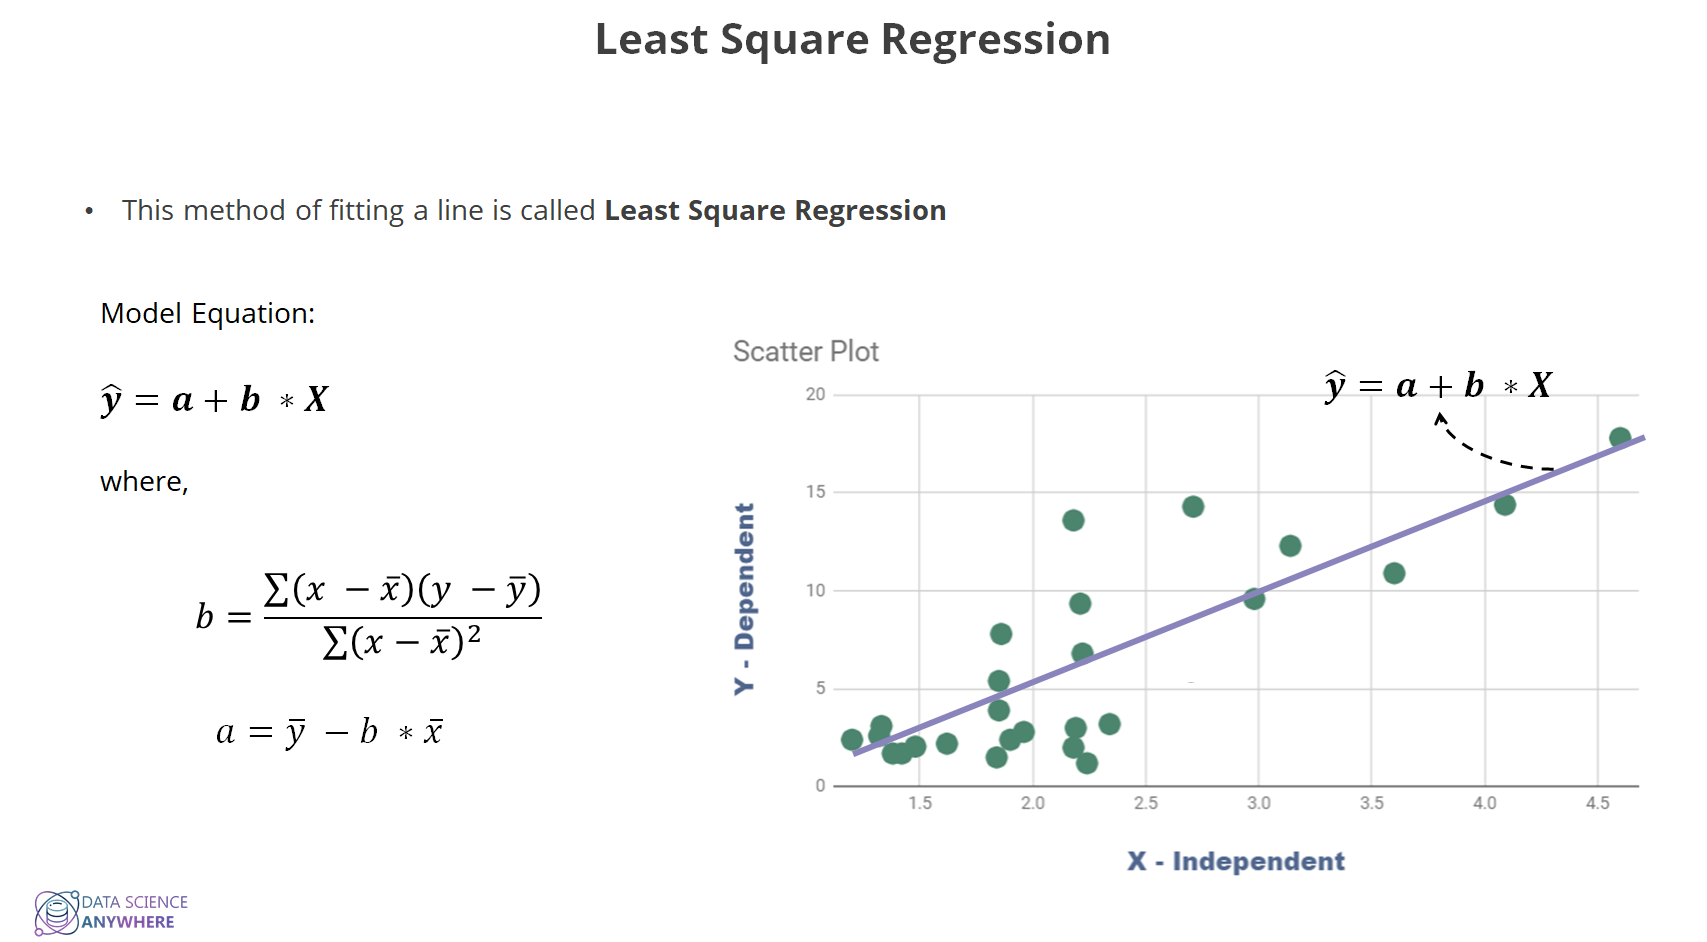

### Linear Regression with Statsmodel

In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('input/regression_data.xlsx')
df.head()

,x,y
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


In [32]:
# OLS
import statsmodels.api as sm
df.head()

In [34]:
# linear regression : oridinary least square regression (OLS)
model_sm = sm.OLS.from_formula(formula='y~x',data=df).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     48.88
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           2.50e-07
Time:                        17:45:21   Log-Likelihood:                -66.251
No. Observations:                  27   AIC:                             136.5
Df Residuals:                      25   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5397      1.619     -2.805      0.0

In [35]:
test_data = pd.DataFrame([[3]],columns=['x'])
model_sm.predict(test_data)

0    9.690892
dtype: float64

In [36]:
fittedvalue = model_sm.fittedvalues

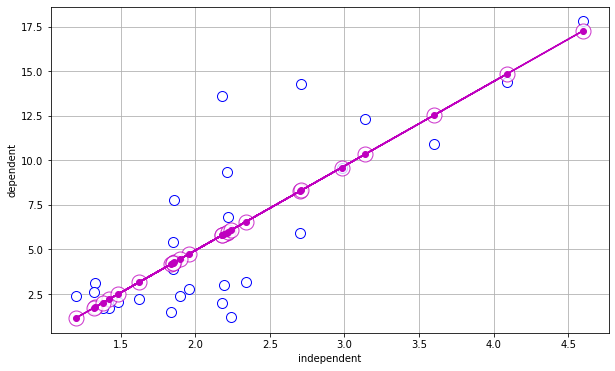

In [37]:
plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'bo',markersize=10,markerfacecolor='w')
# linear regression line
plt.plot(df['x'],fittedvalue,'mo',markersize=15,markerfacecolor='w',alpha=0.8)
plt.plot(df['x'],fittedvalue,'m')
plt.plot(df['x'],fittedvalue,'mo')


plt.xlabel('independent')
plt.ylabel('dependent')
plt.grid()
plt.show()

### Model Evalaution
- SST, SSR, SSE
- MSE
- $R^2$

In [38]:
# df['y']
def sum_of_square(y_value):
    mean_y = y_value.mean()
    ss = np.sum(np.square(y_value - mean_y))
    return ss

In [39]:
SST = sum_of_square(df['y'])
print(SST)

632.0708000000001


In [40]:
SSR = sum_of_square(fittedvalue)
print(SSR)

418.1865036889566


In [41]:
#SSE = SST - SSR
SSE = np.sum(np.square(df['y'] - fittedvalue))
print(SSE)

213.88429631104322


In [42]:
SST - SSR

213.8842963110435

In [43]:
# MSE ( Mean Square Square)
n = len(df)
k = 1 # no. of independent variable
MSE = SSE / (n-k)
print(MSE)

8.226319088886278


In [44]:
# R-square (explained varianc)
R_square = SSR / SST
print(R_square)

0.6616133883877511


---
https://www.datascienceanywhere.com/